<a href="https://colab.research.google.com/github/Chamara-g/fyp_short_sem/blob/master/PCA_2D_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
pip install plotly==3.10.0

In [4]:
import pandas as pd

df = pd.read_pickle("drive/My Drive/FYP/dataset/GSE5281/gse5281_norm.plk")
df.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,1552295_a_at,1552296_at,...,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,class
GSM119615,0.192066,0.035711,0.061625,0.170116,0.078732,0.170804,0.070598,0.070331,0.059378,0.149794,0.048762,0.165953,0.292191,0.212183,0.139367,0.200351,0.084936,0.039528,0.141414,0.221325,0.006121,0.066994,0.154343,0.218468,0.192167,0.050202,0.158940,0.149958,0.264006,0.103812,0.052749,0.194243,0.199124,0.453908,0.131477,0.264622,0.111986,0.012342,0.190684,0.258957,...,0.090851,0.064839,0.034150,0.027478,0.021226,0.033049,0.046026,0.035800,0.106596,0.018223,0.014616,0.015142,0.067261,0.009800,0.029911,0.036936,0.016418,0.029160,0.023175,0.015080,0.015908,0.031338,0.022868,0.018715,0.016263,0.026592,0.012532,0.003286,0.005753,0.003083,0.004239,0.004786,0.002532,0.028735,0.017846,0.016189,0.040901,0.029207,0.062306,Disease State: normal
GSM119616,0.227039,0.079360,0.090087,0.302222,0.171081,0.260997,0.195920,0.019980,0.161671,0.286513,0.244908,0.399101,0.315745,0.453290,0.188811,0.137887,0.006215,0.280962,0.179898,0.139246,0.007657,0.025022,0.256233,0.380263,0.250707,0.172143,0.313611,0.206478,0.431882,0.044231,0.067339,0.281150,0.196325,0.192739,0.007099,0.314979,0.176240,0.107824,0.430220,0.007463,...,0.086554,0.052936,0.097322,0.000479,0.006236,0.000248,0.033619,0.057374,0.149991,0.000183,0.001236,0.000043,0.000000,0.000292,0.000011,0.000763,0.000470,0.000035,0.000117,0.000037,0.001178,0.000086,0.005222,0.000020,0.007974,0.000990,0.000000,0.001544,0.001635,0.010498,0.006378,0.016213,0.015200,0.000311,0.001744,0.000117,0.005659,0.016431,0.023065,Disease State: normal
GSM119617,0.509945,0.051228,0.552980,0.583963,0.152927,0.197303,0.406134,0.050031,0.714266,0.063939,0.350538,0.727023,0.685616,0.507819,0.246226,0.334772,0.332975,0.411283,0.326911,0.129819,0.035339,0.262155,0.605587,0.719809,0.401776,0.721816,0.515757,0.685834,0.505396,0.832320,0.723734,0.226984,0.145171,0.080312,0.627356,0.750255,0.007917,0.094614,0.416816,0.047080,...,0.263616,0.131011,0.226002,0.001002,0.011768,0.002044,0.115225,0.330380,0.794644,0.001469,0.004588,0.000082,0.000745,0.000431,0.000843,0.002152,0.003952,0.002380,0.001502,0.008443,0.000338,0.000615,0.019820,0.000798,0.039702,0.027286,0.009235,0.025822,0.023518,0.043663,0.032197,0.069888,0.064511,0.000549,0.011548,0.000282,0.037763,0.156628,0.612593,Disease State: normal
GSM119618,0.493082,0.058702,0.557494,0.537546,0.022275,0.550088,0.464479,0.017331,0.281511,0.036513,0.901656,0.465483,0.620445,0.406829,0.191919,0.478732,0.249770,0.629261,0.198767,0.388932,0.021385,0.214217,0.728380,0.487136,0.346891,0.192309,0.429598,0.113681,0.654005,0.211291,0.098378,0.284833,0.124208,0.111236,0.106787,0.238370,0.038302,0.157533,0.363600,0.003947,...,0.241698,0.126296,0.211368,0.001125,0.008192,0.000572,0.047690,0.299063,0.725382,0.001442,0.000475,0.000401,0.000048,0.000322,0.000025,0.000106,0.006361,0.001389,0.001026,0.004997,0.000192,0.000140,0.00

**PCA type one**

In [0]:
# split data table into data X and class labels y

X = df.iloc[:,0:160].values #54675
y = df.iloc[:,160].values

In [0]:
import numpy as np

#mean_vec = np.mean(X, axis=0)
#cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1) #Covariance matrix

cov_mat = np.cov(X.T)
#print('Covariance matrix: \n%s' %cov_mat)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)


In [10]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i], df.columns[i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
#for i in eig_pairs:
    #print(i[0])

Everything ok!
Eigenvalues in descending order:


In [40]:
matrix_w = np.hstack((eig_pairs[2][1].reshape(160,1), 
                      eig_pairs[3][1].reshape(160,1)))

#print('Matrix W:\n', matrix_w)
Y = X.dot(matrix_w)
#print(Y.shape)

print(eig_pairs[0][2])
print(eig_pairs[1][2])
print(eig_pairs[2][2])
print(eig_pairs[3][2])
print(eig_pairs[4][2])

1007_s_at
1053_at
117_at
121_at
1255_g_at


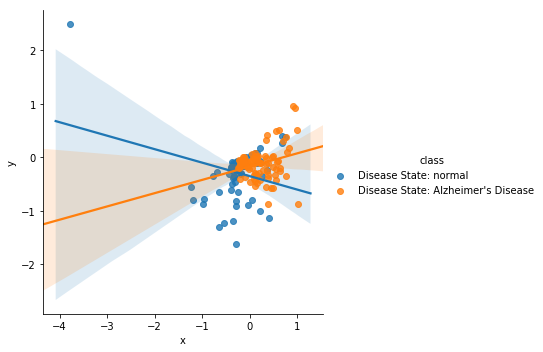

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

#df_for_clust = pd.DataFrame(Y)
df_for_clust = pd.DataFrame(Y, columns=['x','y'])
df_for_clust['class'] = df['class'].values
#df_for_clust

#plot data with seaborn
sns.lmplot(x="x", y="y", hue="class", data=df_for_clust)
#facet = sns.lmplot(data=df_for_clust, x='x', y='y', hue='class', fit_reg=False, legend=True, legend_out=True)

**PCA type two**

In [0]:
df['class'].replace('Disease State: normal', 0,inplace=True)
df['class'].replace('Disease State: Alzheimer\'s Disease' ,1 ,inplace=True)


In [0]:
from sklearn.decomposition import PCA
pca_AD = PCA(n_components=2)
principalComponents_AD = pca_AD.fit_transform(df.iloc[:,0:50000].values)

principal_AD_Df = pd.DataFrame(data = principalComponents_AD
             , columns = ['principal component 1', 'principal component 2'])

principal_AD_Df.tail()

,principal component 1,principal component 2
156,-10.898853,-11.643792
157,-7.499943,-3.531472
158,-12.211972,-12.810672
159,2.273385,11.259744
160,4.574875,11.606509


<Figure size 432x288 with 0 Axes>

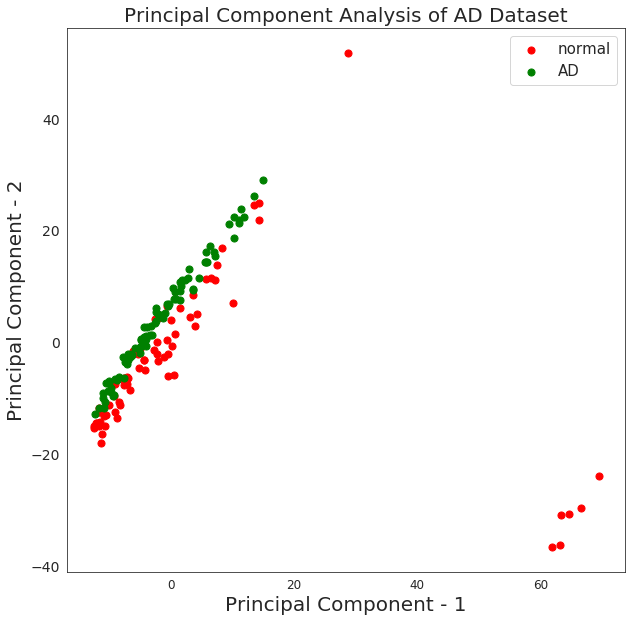

In [0]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of AD Dataset",fontsize=20)
targets = ['normal', 'AD']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['class'].values == target
    plt.scatter(principal_AD_Df.loc[indicesToKeep, 'principal component 1']
               , principal_AD_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

Text(0.5, 0.92, 'PCA on the AD data set')

<Figure size 480x480 with 0 Axes>

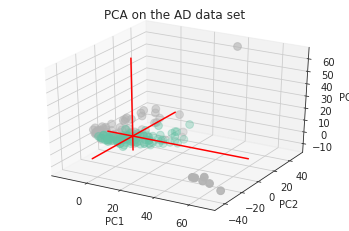

In [0]:
# libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

from mpl_toolkits import mplot3d

# Get the iris dataset
import seaborn as sns
sns.set_style("white")
df1 = sns.load_dataset('iris')

my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
 
# Keep the 'specie' column appart + make it numeric for coloring
df['species']=pd.Categorical(df['class'])
my_color=df['species'].cat.codes

df = df.drop('species', 1)

df = df.iloc[:,0:54676].values

# Run The PCA
pca = PCA(n_components=3)
pca.fit(df)
 
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)])
 
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the AD data set")
#plt.show()
